In [273]:
import pandas as pd
dataset = pd.read_csv('final1.csv')
dataset.head(10)

,ORSUBCODE,DAY,WEEK,SEASON,MEAL,PLACE,EATSEQ,FOODEXRCODE,ORRECIPEDESC,ORFOODCODE,AMOUNTFRAW,AMOUNTFCOOKED,GENDER,AGE,WEIGHT,HEIGHT,GEO
0,CI023,1,W3,S2,M3,P1,1,A00FJ,verdeata,204.2.1.27.0,5.000,3.700,G1,4,30.0,100.0,RO214
1,CI347,1,W3,S2,M5,P1,1,A04PY,bors crud,414.0.0.0.1,100.000,100.000,G1,11,45.0,148.0,RO311
2,CI119,1,W3,S2,M3,P1,1,A00JA,ardei gras,204.2.1.15.2,25.000,20.000,G1,15,63.0,170.0,RO223
3,CM011,1,W3,S2,M3,P1,2,A019C,piper,612.2.16.0.0,1.000,1.000,G2,13,42.0,146.0,RO122
4,CL342,1,W3,S2,M3,P1,1,A00FJ,verdeata,204.2.1.27.0,1.376,1.376,G1,13,56.0,160.0,RO422
5,CC022,1,W1,S2,M3,P3,1,A00FJ,verdeata,204.2.1.27.0,1.600,1.600,G1,15,52.0,178.0,RO423
6,CI170,1,W3,S2,M5,P1,2,A031G,ou (crud),110.1.0.0.0,57.000,50.160,G1,17,68.0,174.0,RO213
7,CI288,1,W3,S2,M1,P1,1,A004Y,paine,207.1.1.6.0,25.000,25.000,G1,17,65.0,165.0,RO123
8,CI224,1,W3,S2,M3,P1,1,A02ML,smantana,101.4.0.0.0,15.000,15.000,G1,10,52.0,145.0,RO317
9,CI272,1,W3,S2,M5,P1,1,A02ML,smantana,101.4.0.0.0,12.500,12.500,G1,16,76.0,178.0,RO313


In [274]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import random
from collections import Counter
import numpy as np

In [275]:
dataset.drop(['ORSUBCODE'], axis=1, inplace=True)
dataset.drop(['FOODEXRCODE'], axis=1, inplace=True)
dataset.drop(['ORFOODCODE'], axis=1, inplace=True)

In [276]:
dataset['WEEK'] = dataset['WEEK'].str.replace('W', '').astype(int)
dataset['SEASON'] = dataset['SEASON'].str.replace('S', '').astype(int)
dataset['MEAL'] = dataset['MEAL'].str.replace('M', '').astype(int)
dataset['PLACE'] = dataset['PLACE'].str.replace('P', '').astype(int)
dataset['GENDER'] = dataset['GENDER'].str.replace('G', '').astype(int)
dataset['GEO'] = dataset['GEO'].str.replace('RO', '').astype(int)

In [277]:
dataset.head(10)

,DAY,WEEK,SEASON,MEAL,PLACE,EATSEQ,ORRECIPEDESC,AMOUNTFRAW,AMOUNTFCOOKED,GENDER,AGE,WEIGHT,HEIGHT,GEO
0,1,3,2,3,1,1,verdeata,5.000,3.700,1,4,30.0,100.0,214
1,1,3,2,5,1,1,bors crud,100.000,100.000,1,11,45.0,148.0,311
2,1,3,2,3,1,1,ardei gras,25.000,20.000,1,15,63.0,170.0,223
3,1,3,2,3,1,2,piper,1.000,1.000,2,13,42.0,146.0,122
4,1,3,2,3,1,1,verdeata,1.376,1.376,1,13,56.0,160.0,422
5,1,1,2,3,3,1,verdeata,1.600,1.600,1,15,52.0,178.0,423
6,1,3,2,5,1,2,ou (crud),57.000,50.160,1,17,68.0,174.0,213
7,1,3,2,1,1,1,paine,25.000,25.000,1,17,65.0,165.0,123
8,1,3,2,3,1,1,smantana,15.000,15.000,1,10,52.0,145.0,317
9,1,3,2,5,1,1,smantana,12.500,12.500,1,16,76.0,178.0,313


In [278]:
le = LabelEncoder()
#dataset['ORRECIPEDESC'] = le.fit_transform(dataset['ORRECIPEDESC'])
dataset['ORRECIPEDESC_encoded'] = le.fit_transform(dataset['ORRECIPEDESC'])

In [279]:
dataset.head(10)

,DAY,WEEK,SEASON,MEAL,PLACE,EATSEQ,ORRECIPEDESC,AMOUNTFRAW,AMOUNTFCOOKED,GENDER,AGE,WEIGHT,HEIGHT,GEO,ORRECIPEDESC_encoded
0,1,3,2,3,1,1,verdeata,5.000,3.700,1,4,30.0,100.0,214,489
1,1,3,2,5,1,1,bors crud,100.000,100.000,1,11,45.0,148.0,311,47
2,1,3,2,3,1,1,ardei gras,25.000,20.000,1,15,63.0,170.0,223,17
3,1,3,2,3,1,2,piper,1.000,1.000,2,13,42.0,146.0,122,388
4,1,3,2,3,1,1,verdeata,1.376,1.376,1,13,56.0,160.0,422,489
5,1,1,2,3,3,1,verdeata,1.600,1.600,1,15,52.0,178.0,423,489
6,1,3,2,5,1,2,ou (crud),57.000,50.160,1,17,68.0,174.0,213,337
7,1,3,2,1,1,1,paine,25.000,25.000,1,17,65.0,165.0,123,342
8,1,3,2,3,1,1,smantana,15.000,15.000,1,10,52.0,145.0,317,432
9,1,3,2,5,1,1,smantana,12.500,12.500,1,16,76.0,178.0,313,432


In [280]:
#dataset.to_csv('test.csv', index=False)

In [281]:
#interest = dataset.values[:,:]
interest = dataset.iloc[:, [col for col in range(dataset.shape[1]) if col != 6]].values
scaler = StandardScaler()
interest_z = scaler.fit_transform(interest)

In [282]:
#k = 3
#scaler = StandardScaler()
#dataset_s = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
#kmeans = KMeans(n_clusters=k, random_state=42)
#dataset['Cluster'] = kmeans.fit_predict(dataset_s)


In [283]:
#plt.scatter(dataset['AGE'], dataset['WEIGHT'], c=dataset['Cluster'], cmap='viridis')
#plt.xlabel('Age')
#plt.ylabel('Weight')
#plt.title('Clustering of Eating Habits')
#plt.show()

In [284]:
random.seed(2345)
kmeans = KMeans(n_clusters=5)
kmeans.fit(interest_z)
kmeans.n_iter_
kmeans.cluster_centers_
dataset['cluster'] = kmeans.labels_
Counter(dataset['cluster'])

c:\Users\Silvian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Counter({3: 8088, 0: 6174, 4: 5717, 1: 508, 2: 364})

In [297]:
dataset.groupby('cluster')['ORRECIPEDESC_encoded'].first()

cluster
0     47
1    489
2     98
3    489
4    388
Name: ORRECIPEDESC_encoded, dtype: int32

In [298]:
dataset.groupby('cluster')['ORRECIPEDESC_encoded'].value_counts().groupby('cluster').idxmax().apply(lambda x: x[1])


cluster
0    425
1    425
2      6
3    425
4    425
Name: count, dtype: int32

In [286]:
dataset.groupby('cluster')['WEIGHT'].mean()

cluster
0    56.853029
1    38.647638
2    47.794231
3    26.967817
4    50.096904
Name: WEIGHT, dtype: float64

In [287]:
average_weight_by_age = dataset.groupby('AGE')['HEIGHT'].mean().reset_index()

print(average_weight_by_age)

    AGE      HEIGHT
0     3   98.975177
1     4  104.118644
2     5  109.491337
3     6  116.018949
4     7  121.910162
5     8  124.176085
6     9  137.005877
7    10  139.735106
8    11  144.450608
9    12  150.156667
10   13  150.646662
11   14  163.674468
12   15  164.894870
13   16  168.442889
14   17  170.804241
15   18  171.267964


In [288]:
dataset.groupby('cluster')[ 'ORRECIPEDESC'].first()

cluster
0       bors crud
1        verdeata
2    carne de pui
3        verdeata
4           piper
Name: ORRECIPEDESC, dtype: object

In [289]:
idx_max_food = dataset.groupby('GEO')['AMOUNTFCOOKED'].idxmax()

most_consumed_food = dataset.loc[idx_max_food, ['GEO', 'ORRECIPEDESC']]

print(most_consumed_food)


       GEO       ORRECIPEDESC
5558   111                suc
9489   112                apa
10145  113                suc
12669  114                apa
13849  115                suc
12090  116             pepene
496    121          apa plata
2611   122              rosie
2991   123          apa plata
19225  124       apa minerala
3116   125                apa
3330   126                suc
11778  211       pepene verde
6308   213       apa minerala
2132   214               cola
2942   215  cartofi preparati
1296   216                apa
9307   221                apa
11081  222                apa
7763   223    compot de caise
356    224             compot
3527   225          apa plata
2498   226          apa plata
14657  311          apa plata
17850  312   apa carbogazoasa
6338   313                apa
5635   315                apa
18814  316                apa
12297  317                apa
1261   322              lapte
10036  411              rosie
1886   412                apa
3400   413

In [290]:
idx_most_popular = dataset.groupby('GENDER')['ORRECIPEDESC'].idxmax()

most_popular_recipes = dataset.loc[idx_most_popular, ['GENDER', 'ORRECIPEDESC']]

print(most_popular_recipes)

      GENDER     ORRECIPEDESC
5880       1           zmeura
597        2  zeama de lamaie


In [291]:
average_weight_by_age = dataset.groupby('AGE')['WEIGHT'].mean().reset_index()

print(average_weight_by_age)


    AGE     WEIGHT
0     3  14.653191
1     4  22.415254
2     5  19.842822
3     6  22.885702
4     7  24.523417
5     8  29.974611
6     9  31.704799
7    10  34.423978
8    11  40.841945
9    12  41.383939
10   13  43.123466
11   14  51.432097
12   15  55.004433
13   16  58.523980
14   17  60.597880
15   18  63.245509


In [292]:
features = dataset.iloc[:, [col for col in range(dataset.shape[1]) if col != 6]].values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

c:\Users\Silvian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


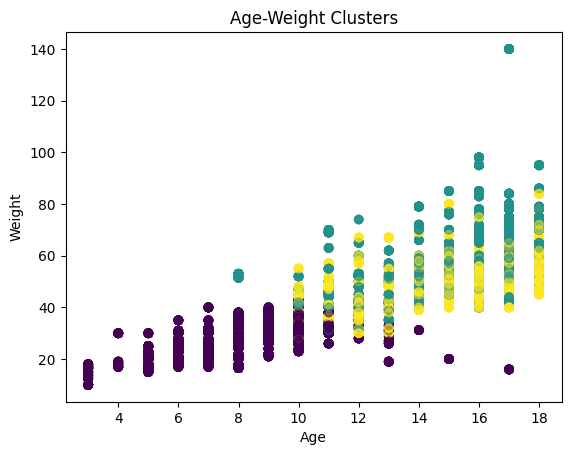

In [293]:
k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_assignments = kmeans.fit_predict(scaled_features)

# Add cluster assignments to the dataset
dataset_with_clusters = np.column_stack((dataset, cluster_assignments))

# Visualize the clusters (you can choose any two features for simplicity)
plt.scatter(dataset_with_clusters[:, 10], dataset_with_clusters[:, 11], c=cluster_assignments, cmap='viridis', alpha=0.5)
plt.title('Age-Weight Clusters')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

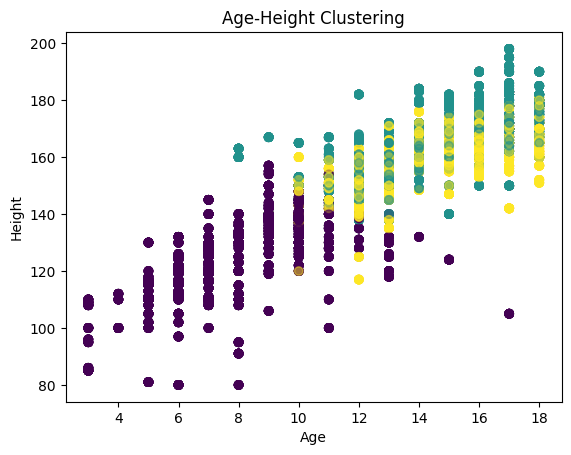

In [294]:
plt.scatter(dataset_with_clusters[:, 10], dataset_with_clusters[:, 12], c=cluster_assignments, cmap='viridis', alpha=0.5)
plt.title('Age-Height Clustering')
plt.xlabel('Age')
plt.ylabel('Height')
plt.show()